In [ ]:
#calculating the descriptive statistics
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
#these are the packages need

In [ ]:
#measure of central tendency

In [ ]:
x = [8.0, 19, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 19, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [ ]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)


In [ ]:
#calculating mean
mean_=sum(x)/len(x)
print(mean_)
#applying the statistics function
mean_s=statistics.mean(x)
print(mean_s)
#fmean always return floating point
mean_s=statistics.mean(x)
print(mean_s)
#using numpy
print(np.mean(y))
#mean function also we can use
y.mean()

12.3
12.3
12.3
12.3


12.3

In [ ]:
# NaN is coming when you do mean if the data contain NaN
mean_ = statistics.mean(x_with_nan)
print(mean_)
#if you want to print by ignore nan the u can use below function
print(np.nanmean(y_with_nan))

nan
8.7


In [ ]:
#mean from pandas ignore the nan values u can use .mean function
print(z_with_nan.mean)
z_with_nan.mean()


<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64>


8.7

In [ ]:
#weighted mean using range or zip function
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
wmean


6.95


6.95

In [ ]:
#for large dataset using numpy and pandas we use np.average
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
print(wmean)
wmean = np.average(z, weights=w)
print(wmean)


6.95
6.95


In [ ]:
#element wide product weighted mean
(w * y).sum() / w.sum()


6.95

In [ ]:
#weighted avg with nan will give nan only
w = np.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
print((w * y_with_nan).sum() / w.sum())

print(np.average(y_with_nan, weights=w))

print(np.average(z_with_nan, weights=w))


nan
nan
nan


In [ ]:
#harmonic mean
hmean = len(x) / sum(1 / item for item in x)
print(hmean)


2.7613412228796843


In [ ]:
#However, if your dataset contains nan, 0, a negative number, or anything but positive numbers, then you’ll get a ValueError!
#with stat fun with nan
print(statistics.harmonic_mean(x_with_nan))

print(scipy.stats.hmean([1, 0, 2]))
#statistics.harmonic_mean([1, 2, -2]) # Raises StatisticsError


nan
0.0


In [ ]:
#hm is simillar function name gmean replace the code with that one
gmean = 1
for item in x:
     gmean *= item

gmean **= 1 / len(x)
gmean


4.677885674856041

In [ ]:
#The main difference between the behavior of the mean and median is related to dataset outliers or extremes.
#The mean is heavily affected by outliers, but the median only depends on outliers either slightly or not at al

n = len(x)
if n % 2:
  median_ = sorted(x)[round(0.5*(n-1))]
else:

  x_ord, index = sorted(x), round(0.5 * n)
  median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_


4

In [ ]:
#If this behavior is not what you want, then you can use nanmedian() to ignore all nan values:
np.nanmedian(y_with_nan)
np.nanmedian(y_with_nan[:-1])
4.0
median_ = np.median(y)
#middle two values low and high
statistics.median_low(x[:-1])
statistics.median_high(x[:-1])
median_ = statistics.median(x)
#pandas Series objects have the method .median() that ignores nan values by

In [ ]:
u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]#set(u) returns a Python set with all unique items in u
mode_
statistics.mode(u)
statistics.multimode(u)

[2]

In [ ]:
#while multimode() returns the list with all modes:
v = [12, 15, 12, 15, 21, 15, 12]
#statistics.mode(v)  # Raises StatisticsError
statistics.multimode(v)


[12, 15]

In [ ]:
#statistics.mode() and statistics.multimode() handle nan values as regular values and can return nan as the modal value:
statistics.mode([2, math.nan, 0, math.nan, 5])
statistics.multimode([2, math.nan, 0, math.nan, 5])

[nan]

In [ ]:
#pandas Series objects have the method .mode() that handles multimodal values well and ignores nan values by default:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
u.mode()


0    2
dtype: int64

In [ ]:
#measure of variability
n = len(x)
mean_ = sum(x) / n
vari = sum((item - mean_)**2 for item in x) / (n - 1)
var_ = statistics.variance(x)

In [ ]:
#If you have nan values among your data, then statistics.variance() will return nan:
#statistics.variance(x_with_nan)
#t’s very important to specify the parameter ddof=1. That’s how you set the delta degrees of freedom to 1.
# This parameter allows the proper calculation of 𝑠², with (𝑛 − 1) in the denominator instead of 𝑛.
var_ = np.var(y, ddof=1)
var_
#If you have nan values in the dataset, then np.var() and .var() will return nan:np.var(y_with_nan, ddof=1)
#If you want to skip nan values, then you should use np.nanvar():np.nanvar(y_with_nan, ddof=1)


123.19999999999999

In [ ]:
#You calculate the population variance
#Replace (n - 1) with n in the pure Python implementation.
#Use statistics.pvariance() instead of statistics.variance().
#Specify the parameter ddof=0 if you use NumPy or pandas. In NumPy, you can omit ddof because its default value is 0.
np.std(y, ddof=1)
#Don’t forget to set the delta degrees of freedom to 1!
#pd.Series objects also have the method .std() that skips nan by default:

11.099549540409285

In [ ]:
#Standard Deviation
std_ = var_ ** 0.5
std_ = statistics.stdev(x)
#calculate the mean if you provide it explicitly as the second argument: statistics.stdev(x, mean_).
#If there are nan values in the dataset, then they’ll return nan.
#To ignore nan values, you should use np.nanstd(). You use std(), .std(), and nanstd() from NumPy as you would use var(), .var(), and nanvar():



In [ ]:
#population standard deviation
#Use statistics.pstdev()
#Specify the parameter ddof=0 if you use NumPy or pandas. In NumPy, you can omit ddof because its default value is 0.

In [ ]:
#Skewness
#One common expression to calculate the skewness of the dataset 𝑥 with 𝑛 elements is (𝑛² / ((𝑛 − 1)(𝑛 − 2))) (Σᵢ(𝑥ᵢ − mean(𝑥))³ / (𝑛𝑠³)).
#A simpler expression is Σᵢ(𝑥ᵢ − mean(𝑥))³ 𝑛 / ((𝑛 − 1)(𝑛 − 2)𝑠³), where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥
#negative skewness values indicate that there’s a dominant tail on the left side,
#Positive skewness values correspond to a longer or fatter tail on the right side


In [ ]:
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x)* n / ((n - 1) * (n - 2) * std_**3))
print(skew_,':- The skewness is positive, so x has a right-side tail.')

1.9470432273905929 :- The skewness is positive, so x has a right-side tail.


In [ ]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
print(scipy.stats.skew(y, bias=False))

scipy.stats.skew(y_with_nan, bias=False)


1.9470432273905927


nan

In [ ]:
#pandas Series objects have the method .skew() that also returns the skewness of a dataset: ignores nan values by default,
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(z.skew())

z_with_nan.skew()


1.9470432273905924


1.9470432273905924

In [ ]:
#Percentiles:Each part has approximately the same number of items.
#If you want to divide your data into several intervals, then you can use statistics.quantiles():
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
print(statistics.quantiles(x, n=2),'median')
statistics.quantiles(x, n=4, method='inclusive')#n defines the number of resulting equal-probability percentiles

[8.0] median


[0.1, 8.0, 21.0]

In [ ]:
y = np.array(x)
print(np.percentile(y, 5))
np.percentile(y, [25, 50, 75])
np.median(y)
#If you want to ignore nan values, then use np.nanpercentile() instead:
np.nanpercentile(y_with_nan, [25, 50, 75])

-3.44


array([2.5, 4. , 8. ])

In [ ]:
#NumPy also offers you very similar functionality in quantile() and nanquantile().
#If you use them, then you’ll need to provide the quantile values as the numbers between 0 and 1 instead of percentiles:
np.quantile(y, 0.05),np.quantile(y, [0.25, 0.5, 0.75]),np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

(-3.44, array([ 0.1,  8. , 21. ]), array([2.5, 4. , 8. ]))

In [ ]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [ ]:
#Ranges
np.ptp(y)
#max() and min() from the Python standard library
#amax() and amin() from NumPy
#nanmax() and nanmin() from NumPy to ignore nan values
#.max() and .min() from NumPy
#.max() and .min() from pandas to ignore nan values by default

46.0

In [ ]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

In [ ]:
#Summary of Descriptive Statistics
result = scipy.stats.describe(y, ddof=1, bias=False)
result.nobs#no. of observations
result.minmax[0]  # Min
result.minmax[1]  # Max
result.skewness
result.kurtosis

0.14770623629658886

In [ ]:
#Measures of Correlation Between Pairs of Data
# Positive correlation x directly to y
#negative correlation x inversly to y
#Weak or no correlation exists

In [ ]:
#Covariance
#The sample covariance is a measure that quantifies the strength
# and direction of a relationship between a pair of variables:
#If the correlation is positive, then the covariance is positive, as well.
# A stronger relationship corresponds to a higher value of the covariance.
#If the correlation is negative, then the covariance is negative, as well.
# A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.
#If the correlation is weak, then the covariance is close to zero.

#Covariance indicates the direction of the linear relationship between variables.
#Correlation measures both the strength and direction of the linear relationship between two variables


In [ ]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

In [ ]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
cov_xy


19.95

In [ ]:
#NumPy has the function cov() that returns the covariance matrix:
cov_matrix = np.cov(x_, y_)
print(cov_matrix)
#The upper-left element of the covariance matrix is the covariance of x and x, or the variance of x.
# Similarly, the lower-right element is the covariance of y and y, or the variance of y
a,b=x_.var(ddof=1),y_.var(ddof=1)
#The other two elements of the covariance matrix are equal and represent the actual covariance between x and y:
cov_xy = cov_matrix[0, 1]

cov_xy = cov_matrix[1, 0]


[[38.5        19.95      ]
 [19.95       13.91428571]]


In [ ]:
#pandas Series have the method .cov() that you can use to calculate the covariance:
cov_xy = x__.cov(y__)
cov_xy = y__.cov(x__)

In [ ]:
#Correlation Coefficienthe correlation coefficient,
# or Pearson product-moment correlation coefficient, is denoted by the symbol 𝑟
#The value 𝑟 > 0 indicates positive correlation.
#The value 𝑟 < 0 indicates negative correlation.
#The value r = 1 is the maximum possible value of 𝑟. It corresponds to a perfect positive linear relationship between variables.
#The value r = −1 is the minimum possible value of 𝑟. It corresponds to a perfect negative linear relationship between variables.
#The value r ≈ 0, or when 𝑟 is around zero, means that the correlation between variables is weak.
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r


0.861950005631606

In [ ]:
#scipy.stats has the routine pearsonr() that calculates the correlation coefficient and the 𝑝-value:
r, p = scipy.stats.pearsonr(x_, y_)
r,p

(0.8619500056316061, 5.122760847201132e-07)

In [ ]:
#Similar to the case of the covariance matrix,
#you can apply np.corrcoef() with x_ and y_ as the arguments and get the correlation coefficient matrix:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix
#inregress() takes x_ and y_, performs linear regression, and
#returns the results. slope and intercept define the equation of the regression line, while rvalue is the correlation coefficient.
#To access particular values from the result of linregress(), including the correlation coefficient, use dot notation:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [ ]:
#pandas Series have the method .corr() for calculating the correlation coefficient:
r = x__.corr(y__)
r

r = y__.corr(x__)
r


0.861950005631606

In [ ]:
#Start by creating a 2D NumPy array:np.mean(a)
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])
a.mean(),np.median(a),a.var(ddof=1)

(5.4, 2.0, 53.40000000000001)

In [ ]:
#Axis=None This behavior is often the default in NumPy.
#axis=0 across all rows, that .This behavior is often the default for SciPy statistical functions.
#axis=1 across all columns, that is, for each row of the array.
np.mean(a, axis=1),np.median(a, axis=0),a.var(axis=1, ddof=1),scipy.stats.gmean(a)  # Default: axis=0
#$You can get a Python statistics summary with a single function call for 2D data with scipy.stats.describe().1D also it works

(array([ 1.,  2.,  5., 13.,  6.]),
 array([4., 3., 1.]),
 array([  0.,   1.,  13., 151.,  75.]),
 array([4.        , 3.73719282, 1.51571657]))

In [ ]:
#DataFrames
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [ ]:
df['A'],df['A'].var()
#Sometimes, you might want to use a DataFrame as a NumPy array and apply some function to it.
# It’s possible to get all data from a DataFrame with .values or .to_numpy():
df.values , df.to_numpy()#df.values and df.to_numpy() give you a NumPy array with all items from the DataFrame without row and column labels

(array([[ 1,  1,  1],
        [ 2,  3,  1],
        [ 4,  9,  2],
        [ 8, 27,  4],
        [16,  1,  1]]),
 array([[ 1,  1,  1],
        [ 2,  3,  1],
        [ 4,  9,  2],
        [ 8, 27,  4],
        [16,  1,  1]]))

In [ ]:
#statistics summary:df.describe()
df.describe().at['mean', 'A']#only one you want

6.2

In [ ]:
#Visualizing Data present your data by Box plots,Histograms,Pie charts,Bar charts,X-Y plots,Heatmaps
#Normally distributed numbers are generated with np.random.randn().
#Uniformly distributed integers are generated with np.random.randint()


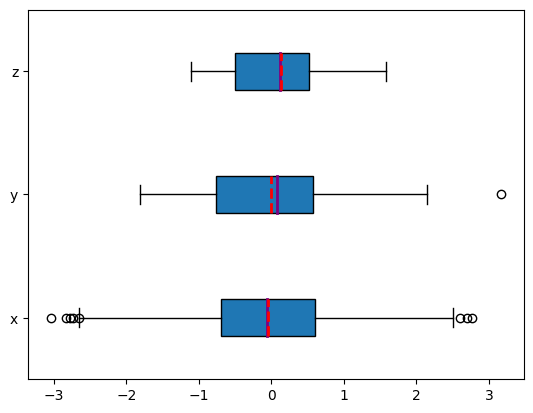

In [ ]:
#Box Plots: represent descriptive statistics
#It can show the range, interquartile range, median, mode, outliers, and all quartiles.
import matplotlib.pyplot as plt

np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

In [ ]:
#The parameters of .boxplot() define the following:

#x is your data.
#vert sets the plot orientation to horizontal when False. The default orientation is vertical.
#showmeans shows the mean of your data when True.
#meanline represents the mean as a line when True. The default representation is a point.
#labels: the labels of your data.
#patch_artist determines how to draw the graph.
#medianprops denotes the properties of the line representing the median.
#meanprops indicates the properties of the line or dot representing the mean.
#The mean is the red dashed line.The median is the purple line.

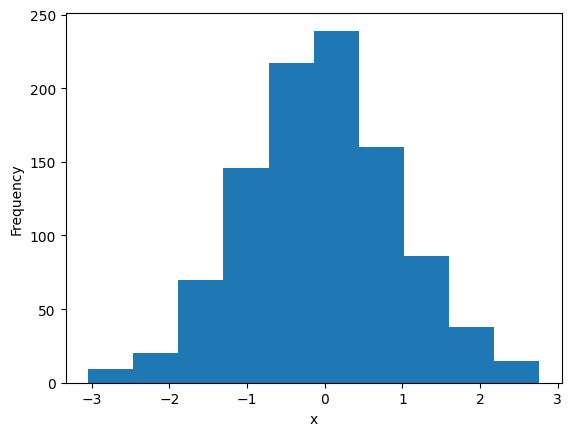

In [ ]:
#Histograms:The histogram divides the values from a sorted dataset into intervals, also called bins.
#all bins are of equal width,
#though this doesn’t have to be the case. The values of the lower and upper bounds of a bin are called the bin edges.
#If you divide a dataset with the bin edges 0, 5, 10, and 15, then there are three bins:0-5(values 0=0,5!=0)
hist, bin_edges = np.histogram(x, bins=10)
hist,bin_edges
#hist contains the frequency or the number of items corresponding to each bin.
#bin_edges contains the edges or bounds of the bin.
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

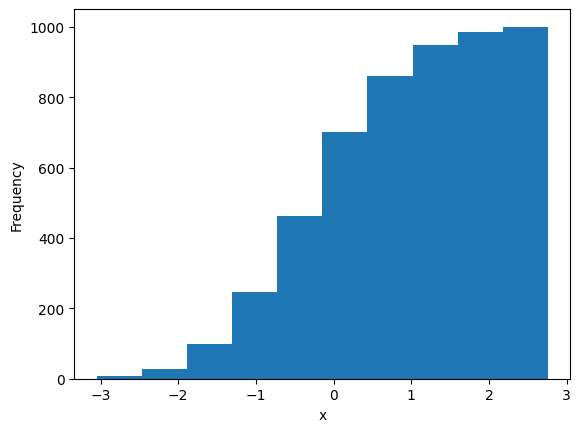

In [ ]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
#The frequency of the first and leftmost bin is the number of items in this bin.
#The frequency of the second bin is the sum of the numbers of items in the first and second bins
#.The other bins follow this same pattern. Finally,
#the frequency of the last and rightmost bin is the total number of items in the dataset (in this case, 1000). You can also directly draw a histogram with pd.Series.hist() using matplotlib in the background.

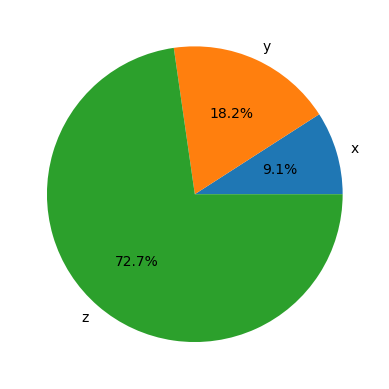

In [ ]:
#Pie Charts:Pie charts represent data with a small number of labels and given relative frequencies
x, y, z = 128, 256, 1024
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

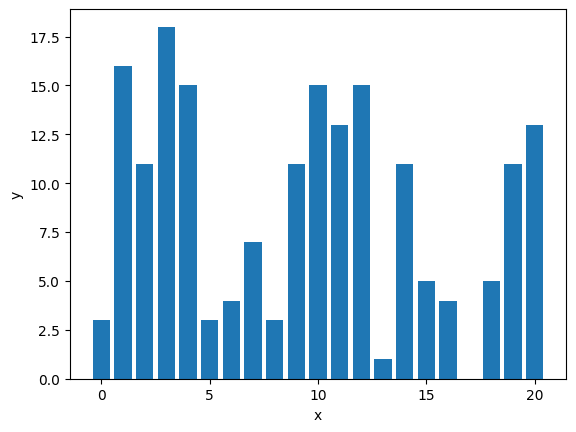

In [ ]:
#Bar Charts:Bar charts also illustrate data that correspond to given labels or discrete numeric values
#They can show the pairs of data from two datasets. Items of one set are the labels, while the corresponding items of the other are their frequencies.
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)
fig, ax = plt.subplots()
ax.bar(x, y, data=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

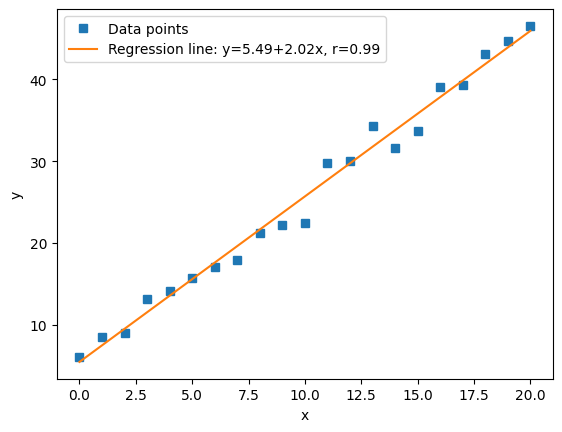

In [ ]:
#X-Y Plots : The x-y plot or scatter plot represents the pairs of data from two datasets
#The horizontal x-axis shows the values from the set x, while the vertical y-axis shows the corresponding values from the set y.
# You can optionally include the regression line and the correlation coefficient.
#Let’s generate two datasets and perform linear regression with scipy.stats.linregress():
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

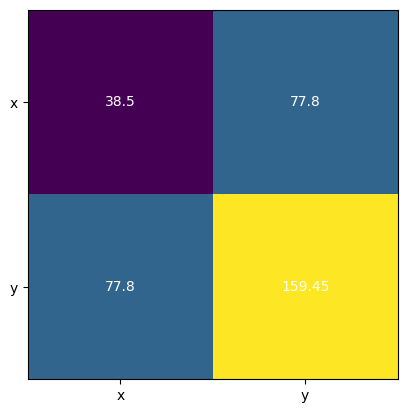

In [ ]:
#Heatmaps : Heatmaps are particularly useful for illustrating the covariance and correlation matrices
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

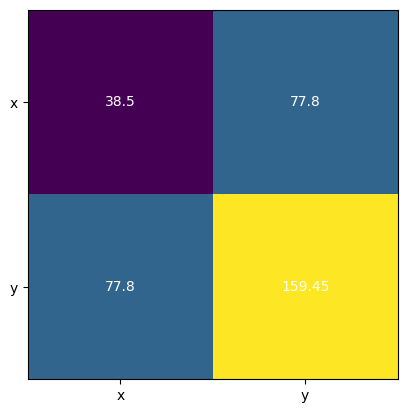

In [ ]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

In [ ]:
#Use Python’s statistics for the most important Python statistics functions.
#Use NumPy to handle arrays efficiently.
#Use SciPy for additional Python statistics routines for NumPy arrays.
#Use pandas to work with labeled datasets.
#Use Matplotlib to visualize data with plots, charts, and histograms.

In [ ]:
#Inferential Statistics
#Parameter: It is a measure that could be mean, median, variance, and many more for population data.

#Statistic: It is a measure that could be mean, median, variance, and many more for sample data.
#Relationship between a parameter and a statistic considering the measure “mean”
#.Sampling and its various techniques


In [ ]:
#Simple Random Sampling:
#Problem: A farmer planted 98 tomato plants last year.
#He has numbered each plant with numbers 1,2,…98.
#Now he wants to study the growth of the plants.
#Help the farmer to select 12 plants randomly as a sample for the study using an appropriate sampling technique
#simple random sampling without replacement
import random
data=list(range(1,99))
sample_without_rep=random.sample(data,k=12)
sample_without_rep
sample_with_rep=random.choices(data,k=12)
sample_with_rep,sample_without_rep

([97, 37, 45, 74, 1, 21, 24, 20, 42, 54, 92, 65],
 [98, 43, 71, 77, 50, 64, 49, 91, 29, 59, 31, 89])

In [ ]:
#Stratified Sampling: he sample data points are selected based on “strata” or commonality. We use “group by” to partition the common data points.
#Problem: A rose nursery contains roses of 5 distinct colors. Select two plants of each color randomly.

'''rose_col = ['White', 'Pink', 'White', 'Red', 'Yellow', 'Orange', 'Orange', 'Red', 'Yellow', 'White', 'Pink',
'White', 'Red', 'Orange']
rose_col.groupby('Color',group_keys=False).apply(lambda x:x.sample(2,random_state=10))'''


"rose_col = ['White', 'Pink', 'White', 'Red', 'Yellow', 'Orange', 'Orange', 'Red', 'Yellow', 'White', 'Pink',\n'White', 'Red', 'Orange']\nrose_col.groupby('Color',group_keys=False).apply(lambda x:x.sample(2,random_state=10))"

In [ ]:
#Systematic Sampling: The first data point is selected randomly and the next one is selected at random intervals.
#Ann has collected 20 beautiful blue marbles pebbles on her last summer vacation. Her mother gave her permission to take only 4 pebbles for her friends.
# Each of the marble is coded with numbers as 1,2,…20. As 2 is her favorite number,
# she wants to select pebbles starting from the 2nd pebble. Help Ann to systematically select the 4 marble pebbles for her friends.
mar=list(range(1,21))
mar_a=np.array(mar)
mar_r=mar_a.reshape(4,5)
mar_r

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [ ]:
b=[]
for i in range(4):
  a=mar_r[i][1]
  b.append(a)
b

[2, 7, 12, 17]

In [ ]:
#Central Limit Theorem:the distribution of the individual means of the samples follows a normal distribution.
#The means of the samples is called Sampling Variation”. Also, it states that the mean of the means of the sample is closely near to the mean of the population
#The standard deviation of the means of the samples is called “Standard Error”.: Standard Error=σ/√n
#where, σ= standard deviation of the population(use sample standard deviation “s” if population standard deviation is unknown), n= sample size

In [ ]:
#Total data points=100 , Number of Samples =10, Sample Size =10
import random
a=range(100)#population
means=[] #list hold the individual sample means
for i in range(10):         #loop for 10 samples
  b=random.sample(a,k=10) #randomly serl
  means.append(np.mean(b))
means



[43.2, 55.0, 53.9, 62.0, 54.2, 42.4, 52.4, 37.8, 51.3, 39.4]

In [ ]:
np.mean(means)

49.16

In [ ]:
np.mean(a)

49.5

In [ ]:
#approxmately near the population mean and sample mean since we can proved the clt

In [ ]:
#3.Estimation :One of the two important parts of inferential statistical analysis is “Estimation” of the population parameter(mean, median, variance, etc)
# that the population parameter could be a certain value(point estimate) or it falls within the range “a” and “b”(interval estimate).
#Sampling Error= population parameter-sample statistic


#The production manager at the automobile company states that all the steel rods are produced with an average length of 26 cm.
#Use the data given in the previous question and calculate the sampling error for the mean.
#Note: Here , the parameter and statistic measure is “mean”.


len_rod= [25.2, 26.3, 28, 21.9, 23.4, 24, 27.2, 23, 29.2, 28.7, 23.1, 23.5, 26.4, 22.8, 24.7]
len_rod = np.array([25.2, 26.3, 28, 21.9, 23.4, 24, 27.2, 23, 29.2, 28.7, 23.1, 23.5, 26.4, 22.8, 24.7])
mu_pop=26
mu_sample=len_rod.mean()
print('sample error: ',(mu_pop-mu_sample))
#The “point estimate” says that the mean of the population is a certain value
      #This is the drawback of “point estimation”.

sample error:  0.8399999999999999


In [ ]:
#To overcome this Confidence Interval” estimation. I am 95% confident that the population mean falls within the range.
#he range of the values from the point estimate on either side till the error magnitude is called “ Margin of Error”.
#A pediatrician wants to check the amount of sugar in the 100g pack of baby food produced by KidsGrow company.
# The medical journal states that a standard deviation of sugar in 100g pack is 8g.
#The pediatrician collects 37 packets of baby food and found that the average sugar is 24g. Find the 90% confidence interval for the population mean.
import scipy.stats
n=100#sample size
sigma=8 #std deviation
xbar=24 #the mean of sample
a=0.10#level of significance=1-confidence level

z_alpha_by_2=scipy.stats.norm.isf(0.1/2)
z_alpha_by_2
lcl=xbar-(z_alpha_by_2*sigma/np.sqrt(n))#lower limit of the interval
ucl=xbar+(z_alpha_by_2*sigma/np.sqrt(n))#upper limit of the interval
print(lcl,ucl)#the interval estimation of the population mean

22.684117098438822 25.315882901561178


In [ ]:
#Alternatively, we can use an in-built function to calculate the interval estimate as
scipy.stats.norm.interval(0.90,xbar,sigma/np.sqrt(n))

(22.684117098438822, 25.315882901561178)

In [ ]:
#This is all about estimating the interval within which the population “mean” would fall using a “Z-distribution”.
 #This is used when we are aware of the standard deviation of the population(i.e ‘σ’) and the sample size n >30.
#In case if the “σ” is unknown and the sample size n < 30, then we use a distribution called “T-distribution”.
#Note: T-distribution is always dependent on what is called a “degree of freedom” of the sample size.
 #If “n” is the sample size, then the degree of freedom is n-1.


# The health magazine in Los Angeles states that a person should drink 1.8 L of water every day.
# To study this statement,the physician collects the data of 15 people and found that the average water intake for
#these people is 1.6 L with a standard deviation of 0.5 L.
 #Calculate the 90% confidence interval for the population's average water intake.



n=15#sample size
mu_sample=1.6 #mean of the sample
std_sample=0.5
a=0.10  #level of significance=1-confidence level\
#since the standard deviation of the population is unknown and n<30, we use t-distribution

t_alpha_by_2=scipy.stats.t.isf(a/2,n-1)#ta/2 is the equalivalent of Za/2 from z-distribution
lcl=mu_sample-(t_alpha_by_2 * std_sample/np.sqrt(n))# lower limit of the interval
ucl=mu_sample+(t_alpha_by_2 * std_sample/np.sqrt(n))# upper limit of the interval
lcl,ucl#invtervel estimation of the population mean

(1.3726158392212553, 1.8273841607787449)

In [ ]:
#All this while we saw the interval estimation for a numerical variable, now let us see the interval
# estimation for the categorical variable(i.e for proportion).
#The assumption we make is that the distribution always follows a normal curve and we use “Z-distribution”.

#The NY university has opened the post of Astrophysics professor. The total number of applications was 36
#. To check the authenticity of the applicants a sample of 10 applications was collected,
#out of which 3 applicants were found to be a fraud. Construct the 95% confidence interval for the population proportion.
n=10 #sample size
p=3/10
scipy.stats.norm.interval(0.95,p,np.sqrt(p*(1-p)/n))


(0.015974234910674623, 0.5840257650893254)

In [ ]:
#Hypothesis and HypothesisTesting
#Hypothesis in statistics is any testable claim or assumption about the parameter of the population.
#It should be capable of being tested, either by experiment or observation

#Types of Hypothesis

#Null Hypothesis(H0):In the type, we say that there is no variation in the outcome. That means, there is no real effect.
#Examples :
#Special training on students does not affect.
#Different teaching method does not affect students’ performance
#The drug used for headaches does not affect the application.

#Alternate Hypothesis(Ha): It is the contrasting statement to H0 where it says there is a real effect in the outcome.
#Examples:
#Special training on students has a significant effect.
#Different teaching method has a significant effect on students’ performance.
#The drug used for headaches has a significant effect after application.

#As we already know, a hypothesis is a testable claim and only either H0 or Ha can be proved.
#The process of proving either of them is called the “Hypothesis Testing Process”.
#Note that if we accept H0, automatically Ha is rejected and vice-versa.

In [ ]:
#We assign a confidence level to hypothesis testing and try to limit the amount of error being committed.
# The universally accepted confidence level is 95%. By doing so we admit that while rejecting the null hypothesis,
# there is a 5% possibility of wrongly rejecting the null hypothesis.

#Note: While framing the Hypothesis statements, the equality sign =, ≤, ≥ should always appear on the Null Hypothesis side : EX: PGNO 85D

In [ ]:
#Hypothesis Testing:

#After framing the hypothesis statements H0 and Ha for a given claim, it is now time to prove either of them wrong.
#This is done by 3 well-defined methods namely,

#a) Critical value approach

#b) p-value approach

#c) Confidence interval approach

#Before going further into each of them,
# we need to understand something called a “left/right-tailed test” or a “two-tailed test”. The trick here is to observe the H0 and Ha statements.
#If H0 has an “=” sign in it, it means to say that is a “two-tailed” test.
# Two-tailed tests are used, when it is required to test if the observed mean is equal to the hypothesized mean.
#One-tailed tests are used, when it is required to test if the observed mean significantly exceeds the hypothesized mean
#or when it is significantly lesser than the hypothesized mean.
#If Ha has a “<” or a “>” sign in it then it is a “left-tailed” and a “right-tailed test” respectively.EX: PGNO 85D

In [ ]:
#a) Critical value approach :
#For a left tailed test, the “test_stat” and the “critical” values will lie on the left of the mean of the normal curve.
# Hence, their values will be negative. Then,

#critical= scipy.stats.norm.ppf(α) using Z-distribution for “σ “(known)

#critical= scipy.stats.t.ppf(α,n-1) using T-distribution for “σ “(unknown)

#For a right-tailed test, the “test_stat” and the “critical” values will lie on the right of the mean of the normal curve.
# Hence, their values will be positive. Then,

#critical= scipy.stats.norm.isf(α) using Z-distribution for “σ “(known)

#critical= scipy.stats.t.isf(α,n-1) using T-distribution for “σ “(unknown)

In [ ]:
#For a two-tailed test, the “test_stat” and the “critical” values can lie on either side of the normal curve.
#If the test_stat is “negative”, use the formula to calculate the critical value from the left tailed test.
#The same can be done if the test_stat is “positive”(i.e use the formula to calculate the critical value from the right-tailed test).

#b) p-value approach:
#For a left tailed test,
 #the “test_stat” and the “critical” values will lie on the left of the mean of the normal curve.
 #Hence, their values will be negative. Then,
#p_value= scipy.stats.norm.cdf(test_stat) using Z-distribution for “σ “(known)
#p_value= scipy.stats.t.cdf(test_stat,n-1) using T-distribution for “σ “(unknown)
#For a right-tailed test,
# the “test_stat” and the “critical” values will lie on the right of the mean of the normal curve. Hence, their values will be positive. Then,
#p_value= scipy.stats.norm.sf(test_stat) using Z-distribution for “σ “(known)
#p_value= scipy.stats.t.sf(test_stat,n-1) using T-distribution for “σ “(unknown)
#For a two-tailed test, the “test_stat” and the “critical” values can lie on either side of the normal curve. If the test_stat is “negative”,
# use the formula to calculate the p-value from the left tailed test.
# The same can be done if the test_stat is “positive”(i.e use the formula to calculate the p-value from the right-tailed test).
# Note that you will have to multiply the p-value by 2 so that it is applicable for both the tails.

In [ ]:
#c) Confidence Interval approach:
#The production manager at tea emporium claims that the weight of a green tea bag is less than 3.5 g.
# To test the manager’s claim consider a sample of 50 tea bags. The sample average weight is found to be 3.28 g with a standard deviation of 0.6 g.
 #Use the p-value technique to test the claim at a 10% level of significance.

#We will work out all the 3 methods of Hypothesis testing

#step 1 : Hypothesis statements
#H0 : weight of green tea bag >= 3.5g, Ha: weight of green tea bag < 3.5g
#It is a left tailed test (i.e t_test and critical value will be 'negative')

#step 2 : alpha given =0.10

#Given
mu_pop=3.5 #mu of the population
n=50 #sample size
xbar=3.28 #givben mean of the sample
s=0.65
a=0.10#given the level of signicance
SE=s/np.sqrt(n)#calculated standard error

#step 3 : calculate the t_test
t_test = (xbar-mu_pop)/SE

#Step 4 : calculate t_critical and p-value and confidence interval

t_critical=scipy.stats.t.ppf(a,n-1)
p_value = scipy.stats.t.cdf(t_test,n-1)
t_alphby_2=scipy.stats.t.isf(a/2,n-1)
LCL=xbar-t_alphby_2*SE
UCL=xbar+t_alphby_2*SE
print('t_test : ',t_test)
print('t_critical: ', t_critical)
print('p_value:', p_value)
print('alpha: ',a)
print(LCL,UCL,mu_pop)


t_test :  -2.3932844901698553
t_critical:  -1.2990687845090694
p_value: 0.010286825762268144
alpha:  0.1
3.125884934391999 3.4341150656080006 3.5


In [ ]:
#step 5 : conclusions
#By critical value approach t_critical > t_test : hence reject H0
#By p-value approach : p-value <0.1 hence reject H0
#By confidence interval approach : mu_ pop does not fall in the interval range. Hence, reject H0
# SO FINALLY WE CAN CONCLUDE THAT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics

In [ ]:
#mean,meadian,mode
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
print(np.mean(df['total_bill']))
print(np.median(df['total_bill']))
print(statistics.mode(df['total_bill']))


19.78594262295082
17.795
13.42


<Axes: >

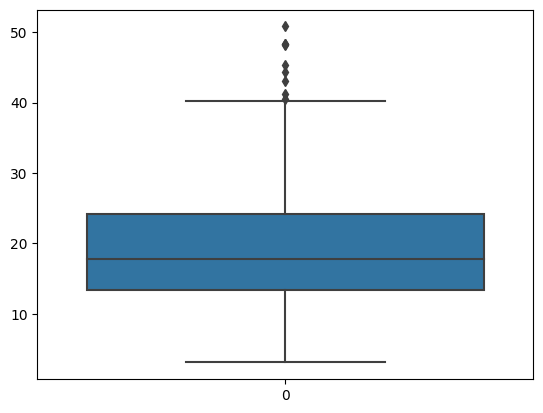

In [ ]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

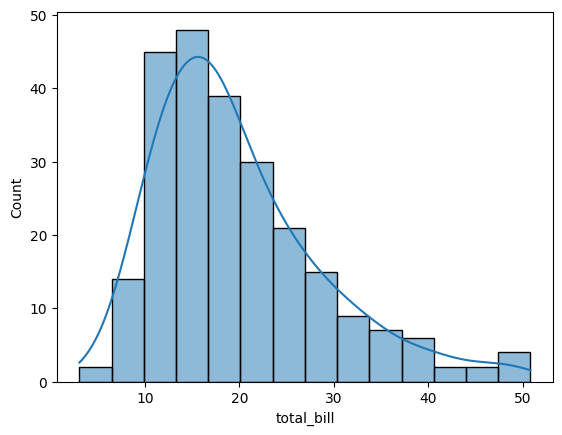

In [ ]:
sns.histplot(df['total_bill'],kde=True)

In [ ]:
df1=sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

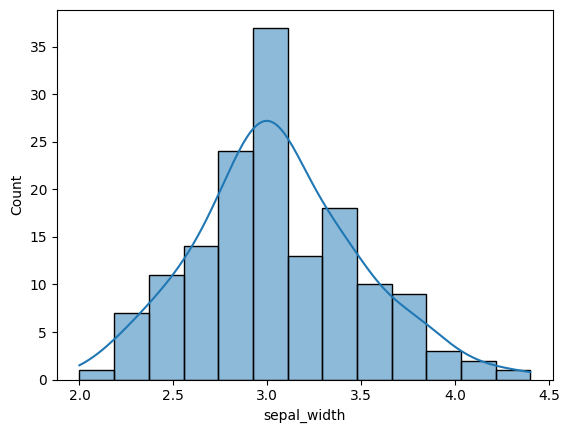

In [ ]:
sns.histplot(df1['sepal_width'],kde=True)

In [ ]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

In [ ]:
#outliers mostly outside(beyond) the 3 standard deviation it will be out liers only
#z-score
dataset=[11,15,1,4,2,6,5,1,5,8,2,1,4,8,62,1,5,1,2,21,2,1,5,1,42,1,53,21,3,6,2,54]
outliers=[]
def detect_outliers(data):
  threshold=3 #sd
  mean=np.mean(data)
  std=np.std(data)

  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)

  return outliers

detect_outliers(dataset)

[62]

In [ ]:
#IQR
dataset=sorted(dataset)
q1,q3=np.percentile(dataset,[25,75])
print(q1,q3)

1.75 8.75


In [ ]:
iqr=q3-q1
lower_fence=q1-1.5*iqr
heigher_fence=q1+1.5*iqr
print(lower_fence,heigher_fence)

-8.75 12.25


<Axes: >

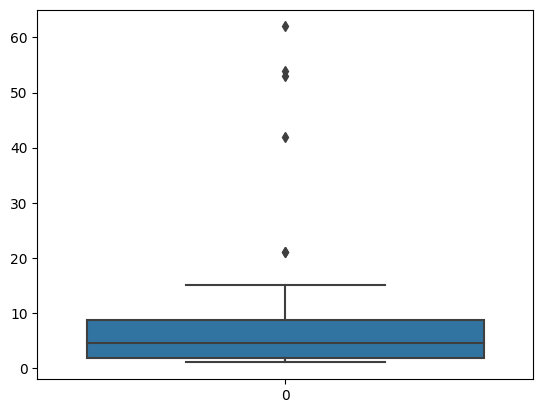

In [ ]:
sns.boxplot(dataset)

In [ ]:
#suppose the IQ in a certain population is normally distributed with a mean of =100 and sd 15
#a researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try
#it and record their iq levels
#the  following code shows how to perform a one sample z-test in python to determine if the new drug causes a
#significant difference in iq levels

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
#enter IQ levels for 20 patients
data=[88,92,94,94,94,96,97,97,97,99,99,105,109,109,109,110,1112,112,113,114,115]

  ztest(data,value=100)

(1.0439732732148796, 0.29649775526190547)